In [1]:
# general tools
import sys
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# stats tools
from scipy.stats import pearsonr, spearmanr
from scipy.ndimage import gaussian_filter

# graph tools
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
from namelist import *
import data_utils as du
import graph_utils as gu
import verif_utils as vu
import model_utils as mu
import train_utils as tu

In [2]:
from scipy.ndimage import gaussian_filter

In [3]:
%matplotlib inline

In [118]:
with h5py.File(PRISM_dir+'land_mask_NA.hdf', 'r') as hdf_io:
    lon_4km = hdf_io['lon_4km'][...]
    lat_4km = hdf_io['lat_4km'][...]
    lon_025 = hdf_io['lon_025'][...]
    lat_025 = hdf_io['lat_025'][...]
    land_mask = hdf_io['land_mask'][...]
    etopo_4km = hdf_io['etopo_4km'][...]
    
etopo_4km[land_mask] = np.nan

In [5]:
# Cartopy map settings
scale_param = '10m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

In [6]:
etopo_4km[land_mask] = np.nan

In [7]:
fig_keys = {'dpi':500, 
            'orientation':'portrait', 
            'papertype':'a4',
            'bbox_inches':'tight', 
            'pad_inches':0, 
            'transparent':True}

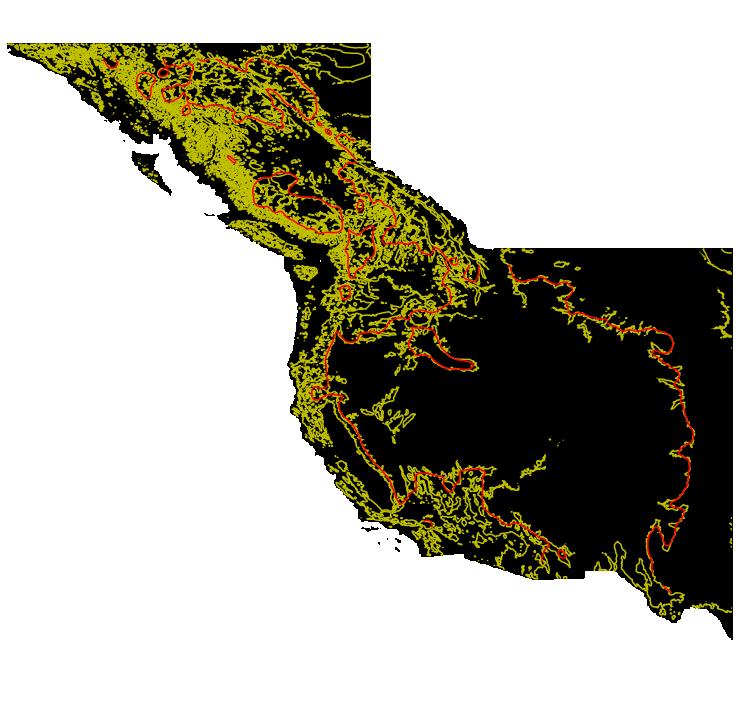

In [120]:
edge = [lon_4km.min(), lon_4km.max(), lat_4km.min(), lat_4km.max()]

fig = plt.figure(figsize=(13, 13))
ax = plt.gca()
# ax = plt.gca(projection=ccrs.PlateCarree())
# ax.set_extent(edge, ccrs.Geodetic())
# ax.add_feature(cfeature.LAND.with_scale(scale_param), facecolor='none')
# ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=0.5, zorder=4)
# ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='-', linewidth=0.5, zorder=4)
# ax.add_feature(PROVINCE, edgecolor='k', linestyle='-', linewidth=0.5, zorder=4)

ax.pcolormesh(lon_4km, lat_4km, land_mask, cmap=plt.cm.gray)
ax.contour(lon_4km, lat_4km, etopo_4km, [500, 1250], colors=('y',))
ax.contour(lon_4km, lat_4km, gaussian_filter(etopo_4km, 5), [1250], colors=('r',))
#ax.outline_patch.set_linewidth(0)
ax.set_axis_off()
fig.savefig(fig_dir+'land_mask.png', format='png', **fig_keys)

In [121]:
with h5py.File(PRISM_dir + 'land_mask_NA.hdf', 'r') as hdf_io:
    lon_025 = hdf_io['lon_025'][...]
    lat_025 = hdf_io['lat_025'][...]  
    lon_4km = hdf_io['lon_4km'][...]
    lat_4km = hdf_io['lat_4km'][...]
    
    land_mask_025 = hdf_io['land_mask_025'][...]
    land_mask_terrain_025 = hdf_io['land_mask_terrain_025'][...]
    
    land_mask = hdf_io['land_mask'][...]
    land_mask_terrain = hdf_io['land_mask_terrain'][...]
    etopo_4km = hdf_io['etopo_4km'][...]
    etopo_regrid = hdf_io['etopo_regrid'][...]

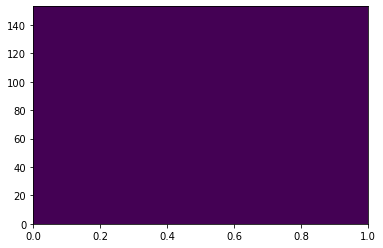

In [136]:
plt.pcolormesh(land_mask_025[:, 160:])

In [ ]:
land_mask_terrain_025[:, 155:] = True
land_mask_terrain_025[145:, :] = True
land_mask_terrain_025[:5, :] = True